In [6]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [7]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [8]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [9]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [10]:
Base = automap_base()

In [11]:
# reflect an existing database into a new model
Base.prepare(autoload_with=engine)
# reflect the tables


In [12]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [13]:
# Save references to each table
Measurements = Base.classes.measurement
Stations = Base.classes.station

In [14]:
from sqlalchemy import inspect
inspector = inspect(engine)
m_columns = inspector.get_columns('measurement')
for m_column in m_columns:
    print(m_column["name"],m_column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [15]:
from sqlalchemy import inspect
inspector = inspect(engine)
s_columns = inspector.get_columns('station')
for s_column in s_columns:
    print(s_column["name"],s_column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [16]:
# Create our session (link) from Python to the DB
session =Session(engine)

# Exploratory Precipitation Analysis

In [17]:
# Find the most recent date in the data set.
recent_date = session.query(Measurements.date).order_by(Measurements.date.desc()).first()
recent_date

('2017-08-23',)

Text(0.5, 1.0, 'Date vs. Prcp in Inches')

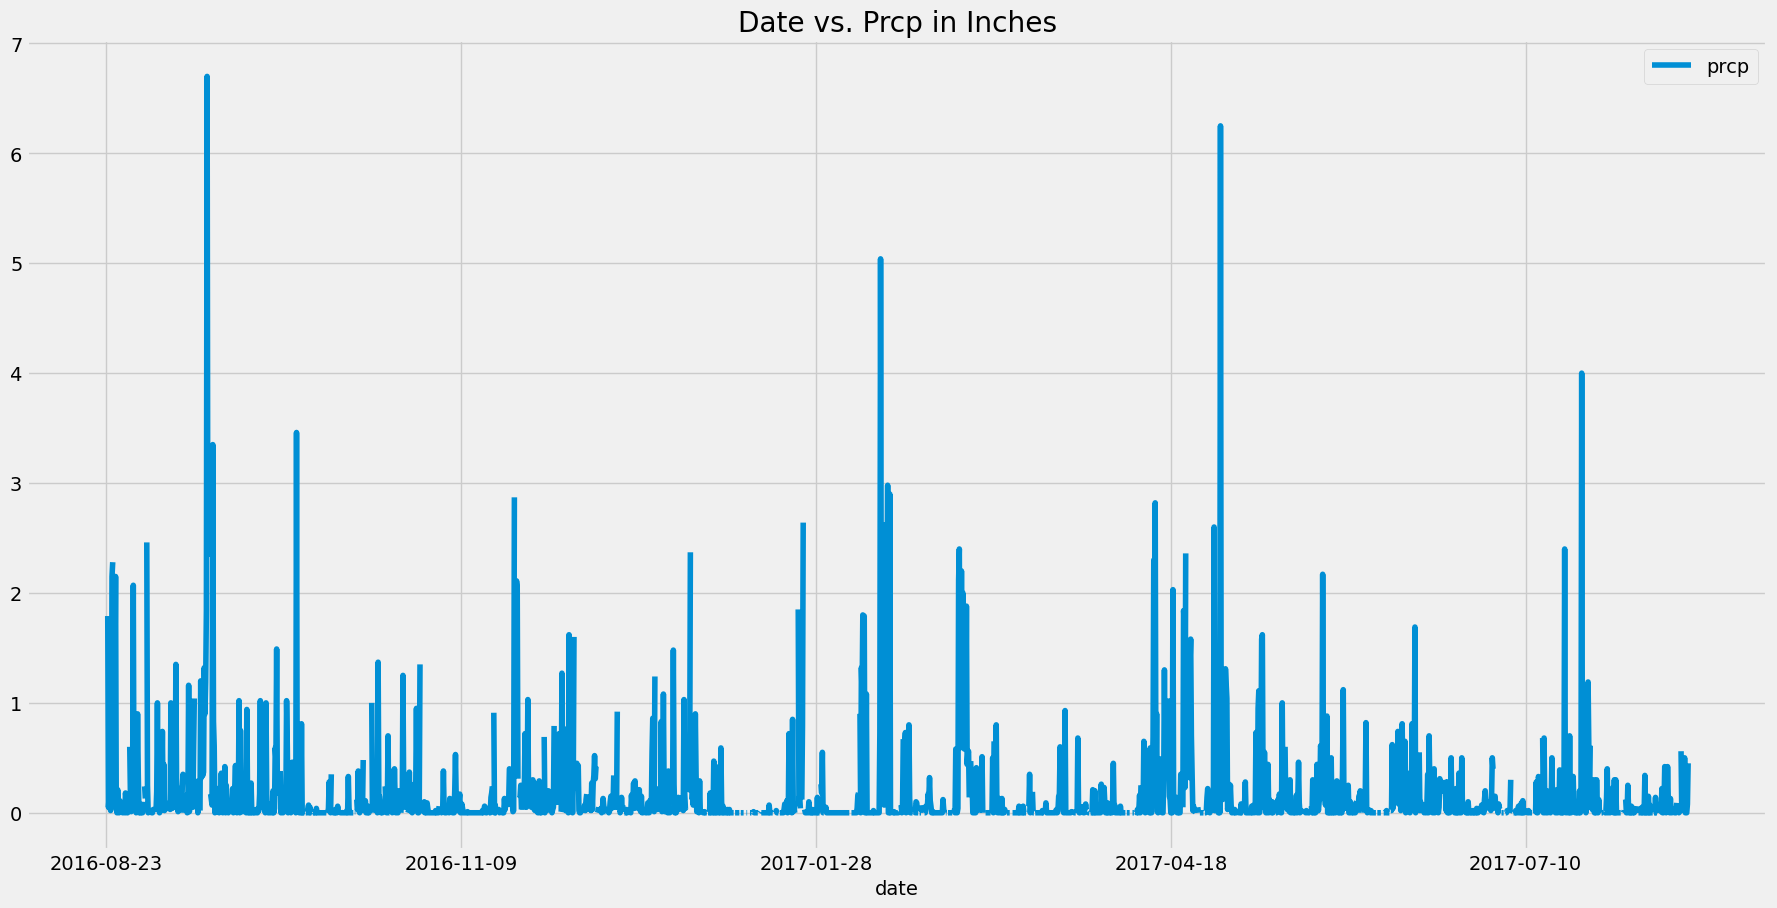

In [114]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
last_yr = dt.date(2017,8,23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
# Save the query results as a Pandas DataFrame. Explicitly set the column names
# Sort the dataframe by date
last_yr_prcp = session.query(Measurements.date,Measurements.prcp).\
        filter(Measurements.date >= last_yr).all()
df = pd.DataFrame.from_dict(last_yr_prcp)
df = df.sort_values(by='date',ascending=True)
# Use Pandas Plotting with Matplotlib to plot the data
df.plot(kind='line',x='date',y='prcp',figsize=(20,10))
plt.title('Date vs. Prcp in Inches')


In [117]:

type(last_yr)

datetime.date

In [115]:
df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [41]:
# Design a query to calculate the total number of stations in the dataset
session.query(Stations).group_by(Stations.name).count()


9

In [67]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_data = session.query(Measurements.station,func.count(Measurements.station)).\
    group_by(Measurements.station).all()
station_data.sort(key=lambda a:a[1],reverse=True)
station_data

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [73]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
recent_station = station_data[0][0]
result = session.query(func.min(Measurements.tobs),func.max(Measurements.tobs),func.avg(Measurements.tobs)).\
              filter(Measurements.station == recent_station).all()

result

[(54.0, 85.0, 71.66378066378067)]

<Axes: ylabel='Frequency'>

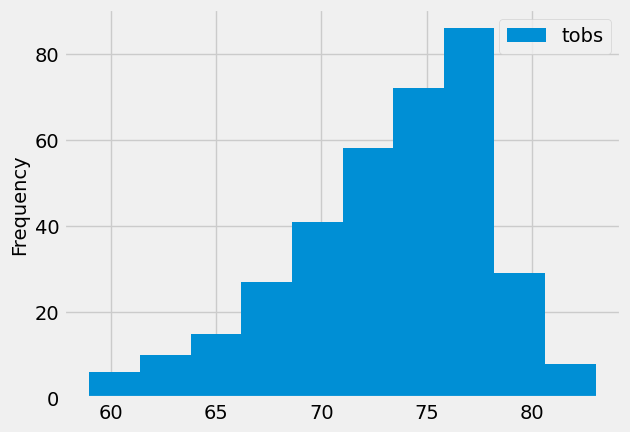

In [112]:
tobs_data = session.query(Measurements.station,Measurements.tobs).\
        filter(Measurements.station == recent_station).\
        filter(Measurements.date >= '2016-08-23').all()
df_tobs = pd.DataFrame(tobs_data)
df_tobs
df_tobs.plot.hist()


In [116]:


df_tobs

,station,tobs
0,USC00519281,77.0
1,USC00519281,77.0
2,USC00519281,80.0
3,USC00519281,80.0
4,USC00519281,75.0
...,...,...
347,USC00519281,77.0
348,USC00519281,77.0
349,USC00519281,76.0
350,USC00519281,76.0


# Close Session

In [113]:
# Close Session
session.close()